problem:

A large MNC have 9 broad verticals across the organisation. One of the problem is identifying the right people for promotion (only for manager position and below) and prepare them in time.

The final promotions are only announced after the evaluation and this leads to delay in transition to new roles. Hence, company needs help in identifying the eligible candidates at a particular checkpoint so that they can expedite the entire promotion cycle.

Multiple attributes have been provided around Employee's  past and current performance along with demographics.

Features:

*employee_id: Unique ID for employee
*department: Department of employee
*region: Region of employment (unordered)
*education: Education Level
*gender: Gender of Employee
*recruitment_channel: Channel of recruitment for employee
*no_ of_ trainings: no of other trainings completed in previous year on soft skills, technical skills etc.
*age: Age of Employee
*previous_ year_ rating: Employee Rating for the previous year
*length_ of_ service: Length of service in years
*awards_ won?: if awards won during previous year then 1 else 0
*avg_ training_ score: Average score in current training evaluations
*is_promoted: (Target) Recommended for promotion

 importing nesessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTENC
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline


C:\Users\User\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=pd.read_csv('train.csv')

In [3]:
test=pd.read_csv('test.csv')

In [4]:
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,45,0


In [5]:
df.select_dtypes(include= 'O').columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel'], dtype='object')

In [6]:
test

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,70


In [7]:
df.shape

(54808, 13)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


In [9]:
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [10]:
department=df.groupby('department')

In [11]:
HR=department.get_group('HR')

In [12]:
HR['is_promoted'].value_counts()

0    2282
1     136
Name: is_promoted, dtype: int64

In [13]:
df['department'].unique()

array(['Sales & Marketing', 'Operations', 'Technology', 'Analytics',
       'R&D', 'Procurement', 'Finance', 'HR', 'Legal'], dtype=object)

In [14]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won?', 'avg_training_score',
       'is_promoted'],
      dtype='object')

In [15]:
#def value_counts :
    #for i in df['department'].unique()
    #department.get_group('i')
    #i['is_promoted'].value_counts()
    

In [16]:



def value_counts(df):
    import pandas as pd
    
    # Loop over unique values in the 'department' column
    for i in df['department'].unique():
        
        # Get a groupby object for the current department
        department = df.groupby('department')
        group = department.get_group(i)
        
        # Print the value counts for the 'is_promoted' column
        print(f"Department: {i}")
        print(group['is_promoted'].value_counts())


In [17]:
df.groupby('department')['age'].min()

department
Analytics            20
Finance              20
HR                   20
Legal                23
Operations           20
Procurement          20
R&D                  24
Sales & Marketing    20
Technology           20
Name: age, dtype: int64

In [18]:
df.groupby('department')['age'].max()

department
Analytics            60
Finance              60
HR                   60
Legal                60
Operations           60
Procurement          60
R&D                  50
Sales & Marketing    60
Technology           60
Name: age, dtype: int64

In [19]:
def value_counts(df, column_name):
    # Loop over each unique department in the "department" column
    for department_name in df['department'].unique():
        # Get the DataFrame for this department using get_group()
        department_df = df.groupby('department').get_group(department_name)
        
        # Count the occurrences of each unique value in the specified column for this department
        value_counts = department_df[column_name].value_counts()
        
        # Print the value counts for this department
        print(f"{department_name}:")
        print(value_counts)
        print()


In [20]:
def value_counts(df):
    import pandas as pd
    
    # Loop over unique values in the 'department' column
    for i in df['department'].unique():
        
        # Get a groupby object for the current department
        department = df.groupby('department')
        group = department.get_group(i)
        
        # Print the value counts for the 'is_promoted' column
        print(f"Department: {i}")
        print(group['is_promoted'].value_counts())


In [21]:
value_counts(df)

Department: Sales & Marketing
0    15627
1     1213
Name: is_promoted, dtype: int64
Department: Operations
0    10325
1     1023
Name: is_promoted, dtype: int64
Department: Technology
0    6370
1     768
Name: is_promoted, dtype: int64
Department: Analytics
0    4840
1     512
Name: is_promoted, dtype: int64
Department: R&D
0    930
1     69
Name: is_promoted, dtype: int64
Department: Procurement
0    6450
1     688
Name: is_promoted, dtype: int64
Department: Finance
0    2330
1     206
Name: is_promoted, dtype: int64
Department: HR
0    2282
1     136
Name: is_promoted, dtype: int64
Department: Legal
0    986
1     53
Name: is_promoted, dtype: int64


In [22]:
df['department'].value_counts()

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

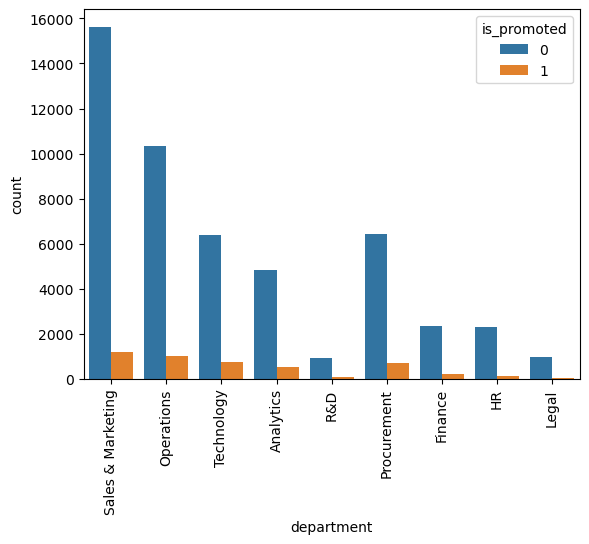

In [23]:
sns.countplot(x=df['department'],hue='is_promoted',data=df)
plt.xticks(rotation=90)
plt.show()

In [24]:
department_names=df['department'].value_counts().index

In [25]:
department_count=df['department'].value_counts().values

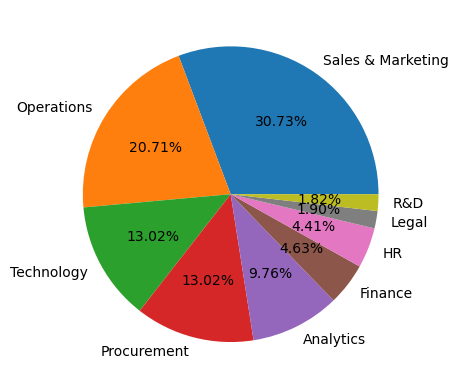

In [26]:
plt.pie(department_count,labels=department_names,autopct='%1.2f%%')
plt.show()

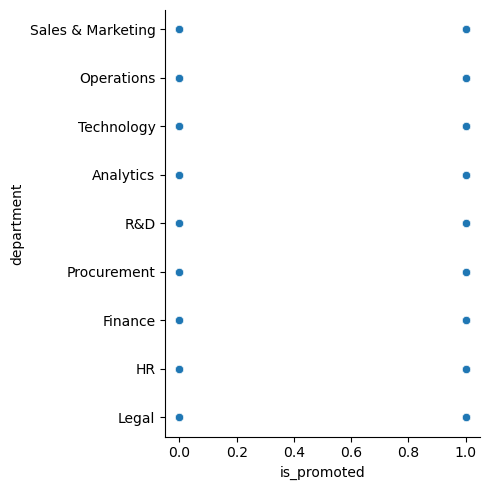

In [27]:
sns.relplot(y='department',x='is_promoted',data=df)

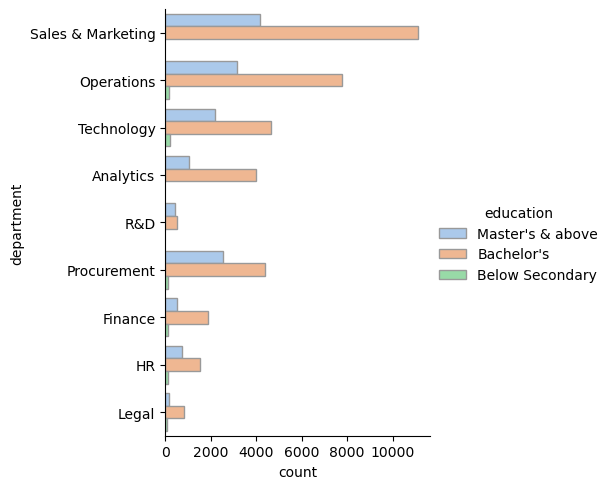

In [28]:
sns.catplot(
    data=df, y="department", hue="education", kind="count",
    palette="pastel", edgecolor=".6",
)

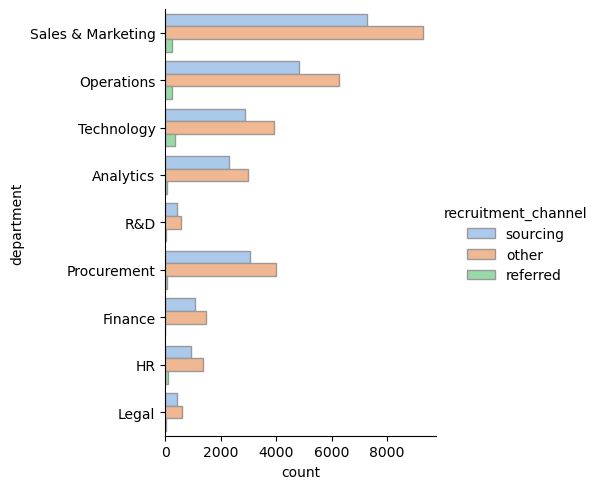

In [29]:
sns.catplot(
    data=df, y="department", hue="recruitment_channel", kind="count",
    palette="pastel", edgecolor=".6",
)

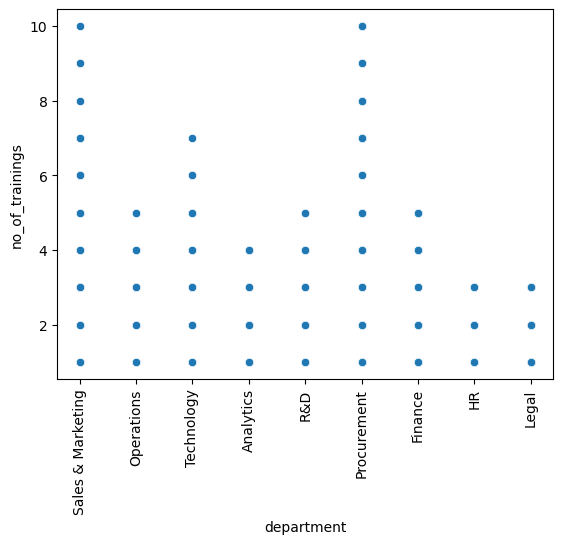

In [30]:
sns.scatterplot(x=df['department'],y=df['no_of_trainings'])
plt.xticks(rotation=90)
plt.show()

In [31]:
df['region'].value_counts()

region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: region, dtype: int64

<AxesSubplot:xlabel='count', ylabel='region'>

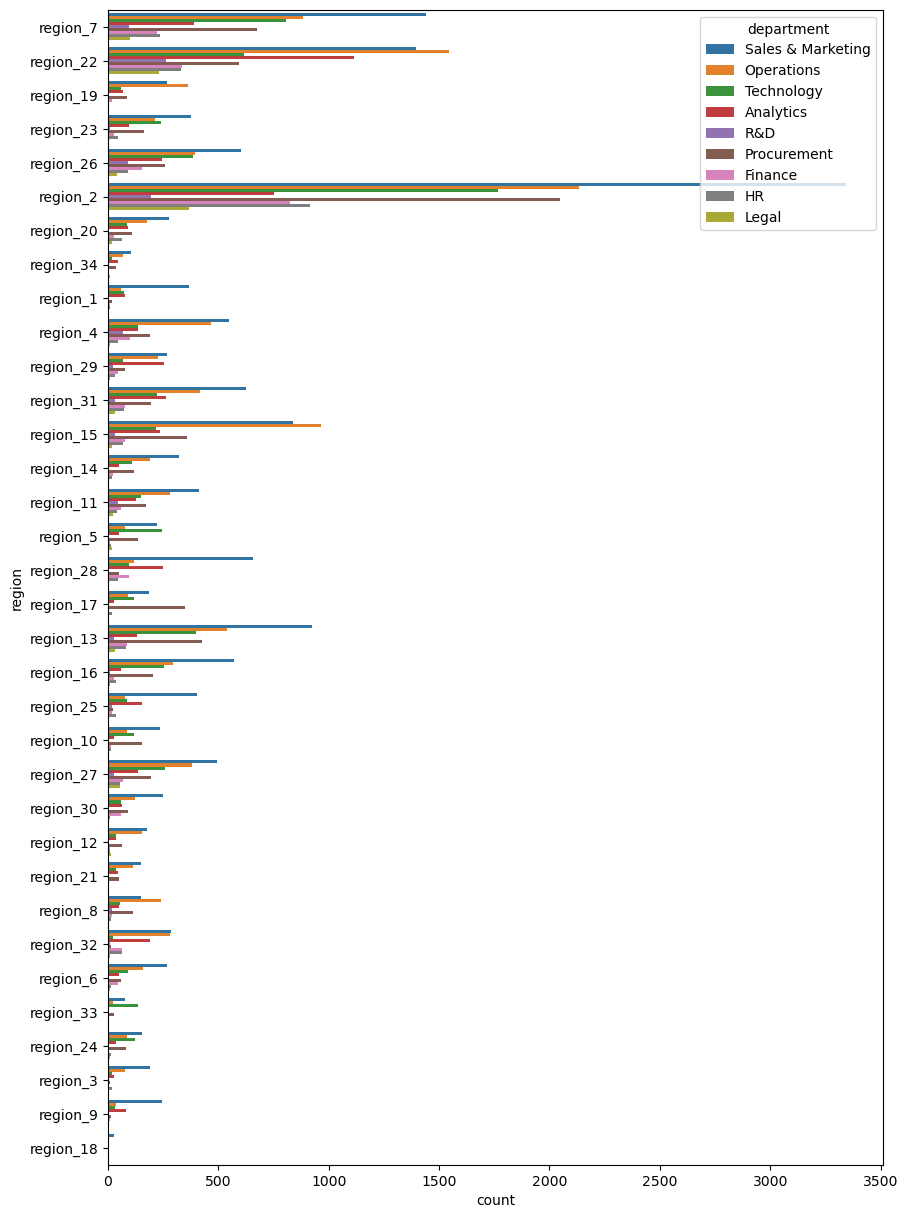

In [32]:
plt.figure(figsize=(10,15))
sns.countplot(y=df['region'],hue='department',data=df)

<AxesSubplot:xlabel='count', ylabel='region'>

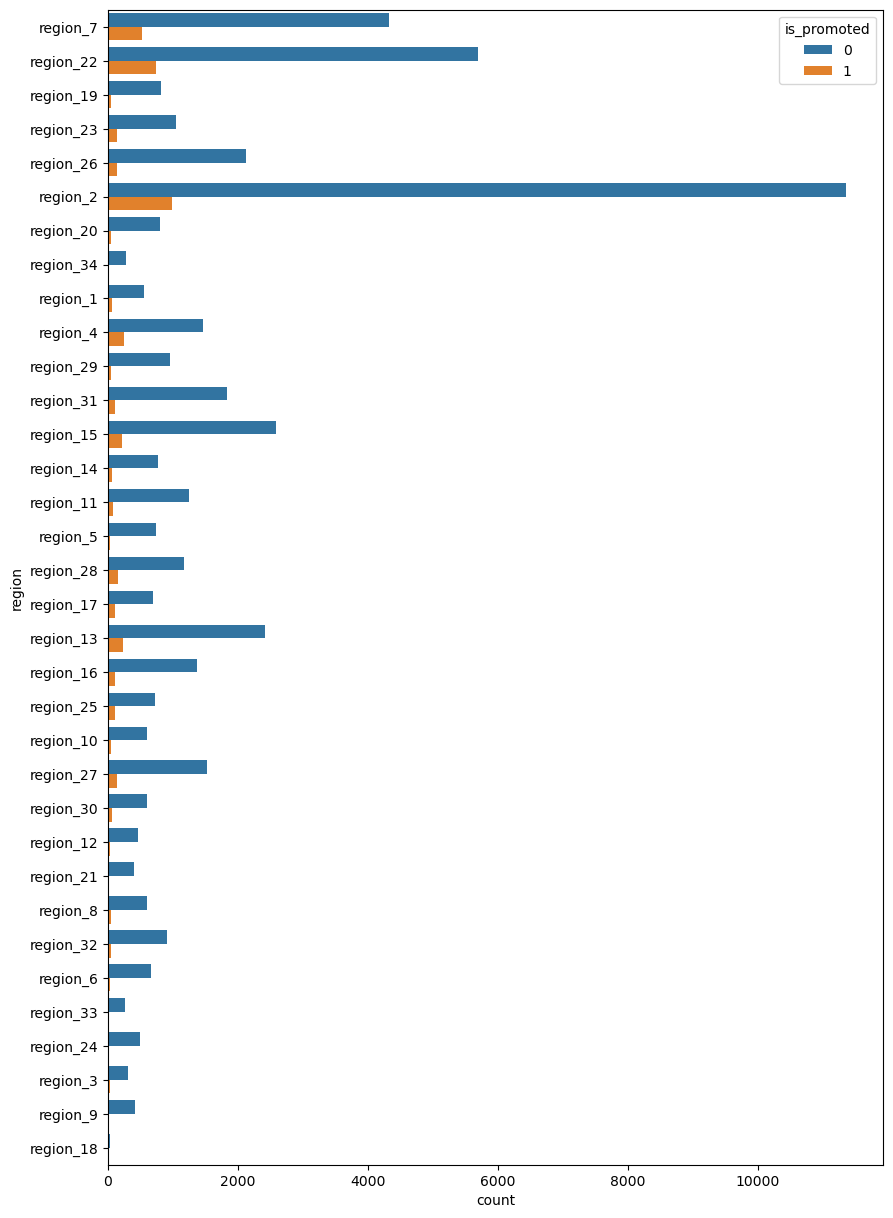

In [33]:
plt.figure(figsize=(10,15))
sns.countplot(y=df['region'],hue='is_promoted',data=df)

In [34]:
df['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

<AxesSubplot:xlabel='education', ylabel='count'>

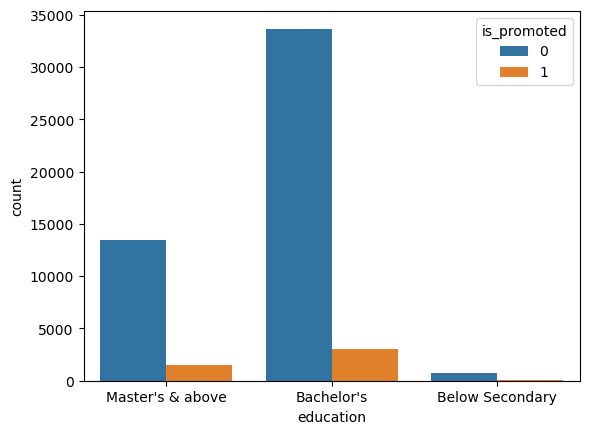

In [35]:
sns.countplot(x=df['education'],hue='is_promoted',data=df)

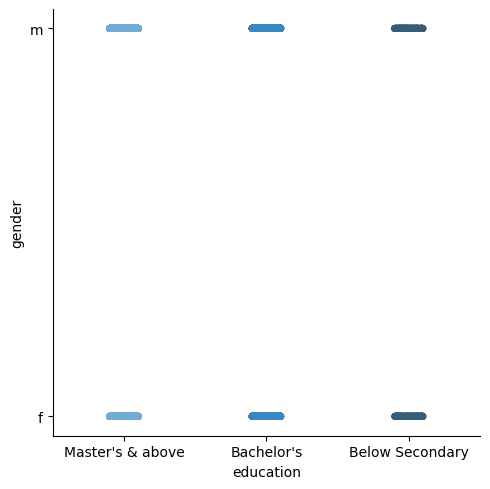

In [36]:
sns.catplot(x='education',y='gender',palette='Blues_d',data=df)

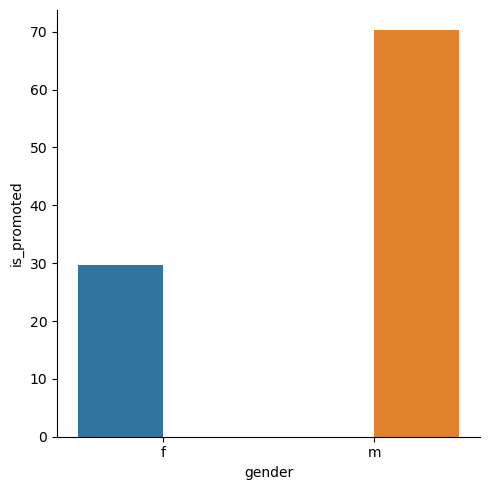

In [37]:
sns.catplot(x='gender', y='is_promoted', hue='gender', kind='bar', estimator=lambda x: len(x) / len(df) * 100, data=df)



In [38]:
df['recruitment_channel'].value_counts()

other       30446
sourcing    23220
referred     1142
Name: recruitment_channel, dtype: int64

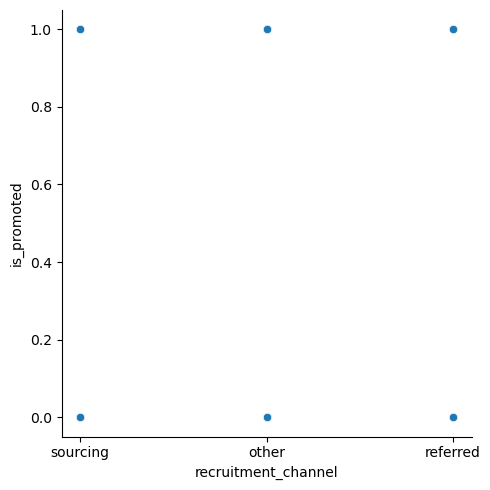

In [39]:
sns.relplot(x='recruitment_channel',y='is_promoted',data=df)

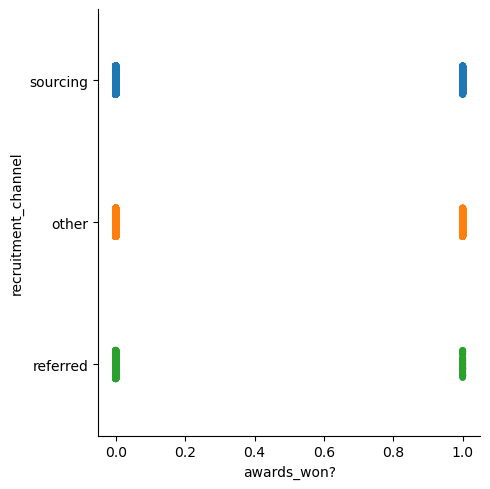

In [40]:
sns.catplot(y='recruitment_channel',x='awards_won?',data=df)

In [41]:
for col in df.columns:
    table = pd.crosstab(df[col], columns='count')
    print(f"Contingency table for column '{col}':\n{table}\n")

Contingency table for column 'employee_id':
col_0        count
employee_id       
1                1
2                1
4                1
5                1
7                1
...            ...
78292            1
78294            1
78296            1
78297            1
78298            1

[54808 rows x 1 columns]

Contingency table for column 'department':
col_0              count
department              
Analytics           5352
Finance             2536
HR                  2418
Legal               1039
Operations         11348
Procurement         7138
R&D                  999
Sales & Marketing  16840
Technology          7138

Contingency table for column 'region':
col_0      count
region          
region_1     610
region_10    648
region_11   1315
region_12    500
region_13   2648
region_14    827
region_15   2808
region_16   1465
region_17    796
region_18     31
region_19    874
region_2   12343
region_20    850
region_21    411
region_22   6428
region_23   1175
region_24    508
r

In [42]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won?', 'avg_training_score',
       'is_promoted'],
      dtype='object')

<AxesSubplot:xlabel='no_of_trainings', ylabel='is_promoted'>

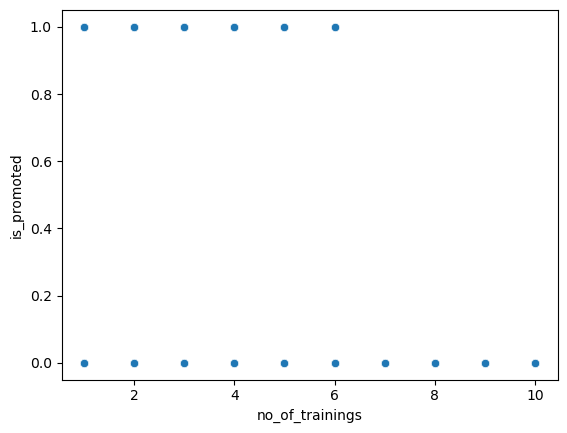

In [43]:
sns.scatterplot(x=df['no_of_trainings'],y=df['is_promoted'])

<AxesSubplot:xlabel='previous_year_rating', ylabel='is_promoted'>

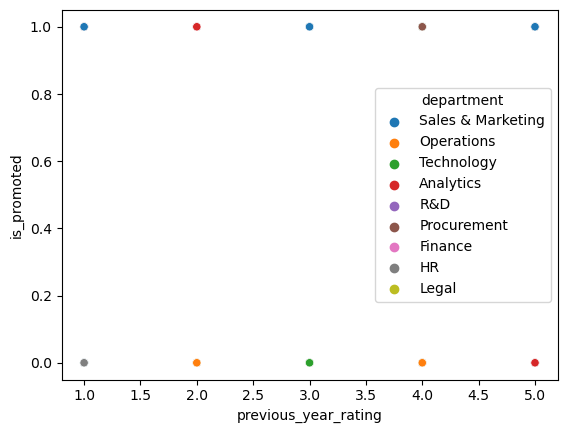

In [44]:
sns.scatterplot(x='previous_year_rating',y='is_promoted',hue='department',data=df)

<AxesSubplot:xlabel='length_of_service', ylabel='is_promoted'>

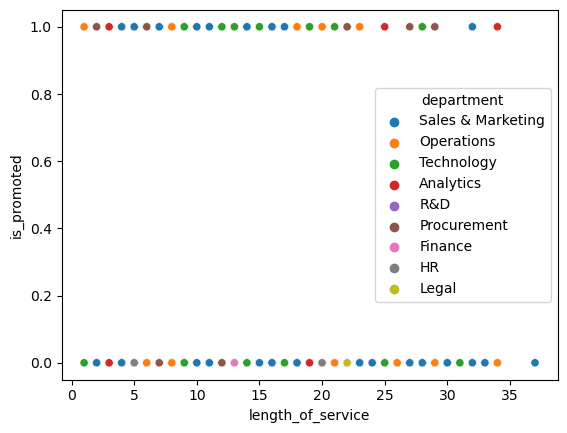

In [46]:
sns.scatterplot(x='length_of_service',y='is_promoted',hue='department',data=df)

<AxesSubplot:xlabel='is_promoted', ylabel='age'>

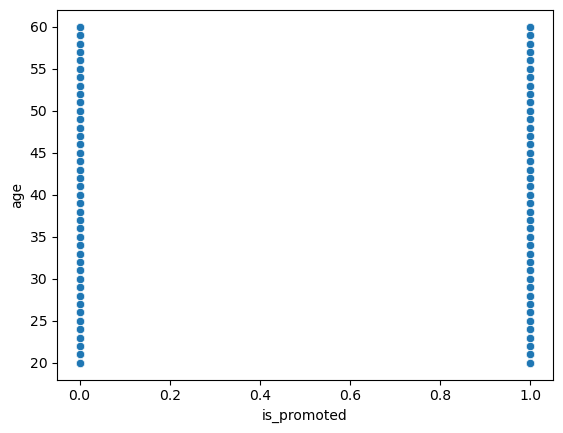

In [47]:
sns.scatterplot(x=df['is_promoted'],y=df['age'])

In [48]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


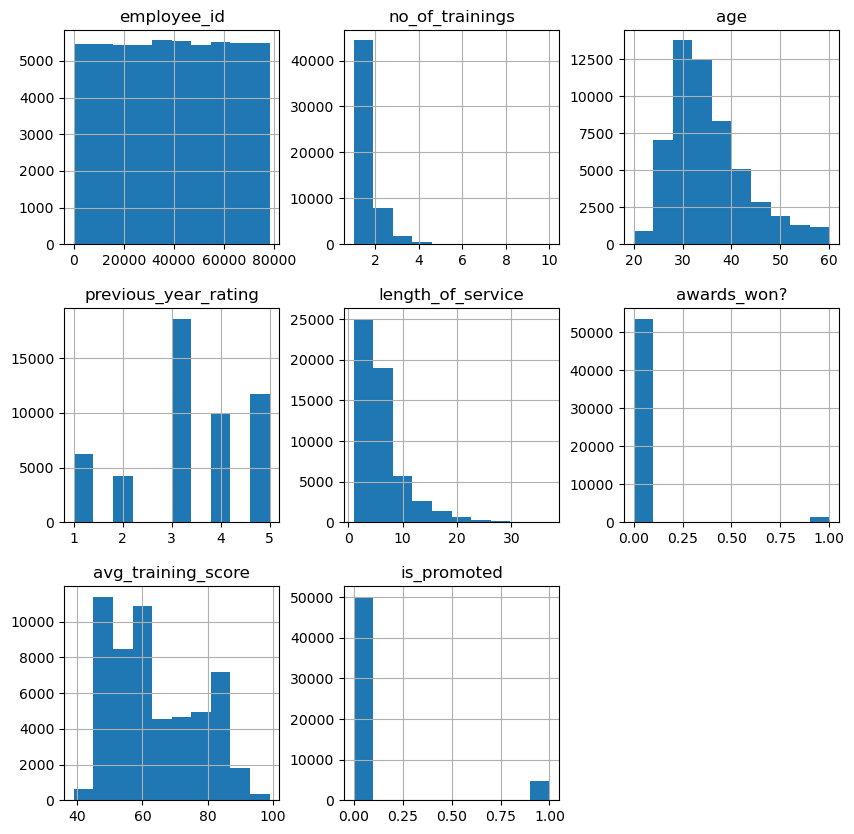

In [49]:

df.hist(figsize =(10,10), bins =10)
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

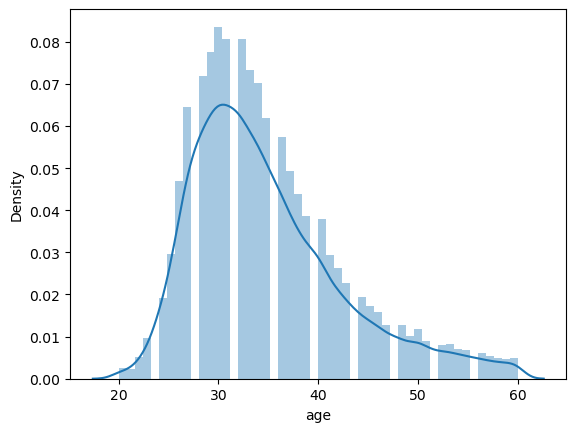

In [50]:
sns.distplot(df['age'])

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

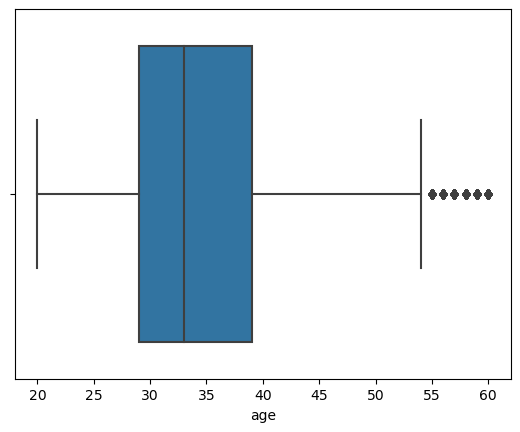

In [51]:
sns.boxplot(df['age'])

In [52]:
df.corr()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
employee_id,1.000000,-0.005121,0.000437,0.004533,0.001274,0.008420,-0.000586,0.001206
no_of_trainings,-0.005121,1.000000,-0.081278,-0.063126,-0.057275,-0.007628,0.042517,-0.024896
age,0.000437,-0.081278,1.000000,0.006008,0.657111,-0.008169,-0.048380,-0.017166
previous_year_rating,0.004533,-0.063126,0.006008,1.000000,0.000253,0.027738,0.075139,0.159320
length_of_service,0.001274,-0.057275,0.657111,0.000253,1.000000,-0.039927,-0.038122,-0.010670
awards_won?,0.008420,-0.007628,-0.008169,0.027738,-0.039927,1.000000,0.072138,0.195871
avg_training_score,-0.000586,0.042517,-0.048380,0.075139,-0.038122,0.072138,1.000000,0.181147
is_promoted,0.001206,-0.024896,-0.017166,0.159320,-0.010670,0.195871,0.181147,1.000000


<AxesSubplot:>

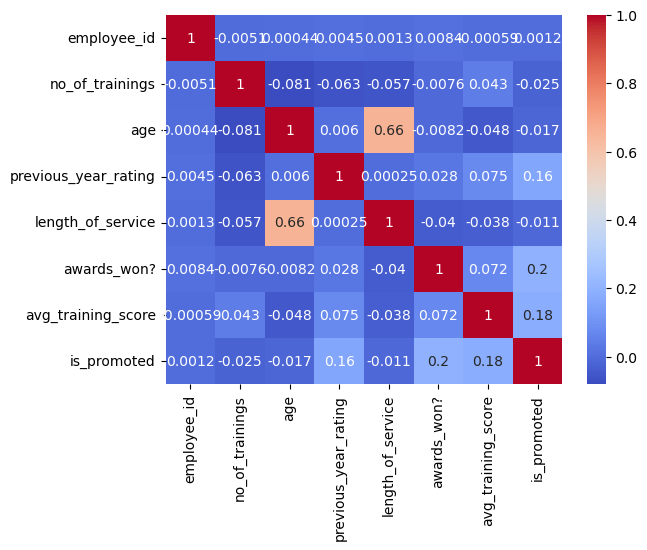

In [53]:
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

In [54]:
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [55]:
df['previous_year_rating'].mean()

3.329255780917055

In [56]:
df['education']=df['education'].fillna(df['education'].mode()[0])

In [57]:
df['previous_year_rating']=df['previous_year_rating'].fillna(df['previous_year_rating'].mean())

In [58]:
df_2=df.drop('employee_id',axis=1)

In [59]:
df_2=pd.get_dummies(df_2)

In [60]:
x=df_2.drop('is_promoted',axis=1)

In [61]:
x.isnull().sum()

no_of_trainings                 0
age                             0
previous_year_rating            0
length_of_service               0
awards_won?                     0
avg_training_score              0
department_Analytics            0
department_Finance              0
department_HR                   0
department_Legal                0
department_Operations           0
department_Procurement          0
department_R&D                  0
department_Sales & Marketing    0
department_Technology           0
region_region_1                 0
region_region_10                0
region_region_11                0
region_region_12                0
region_region_13                0
region_region_14                0
region_region_15                0
region_region_16                0
region_region_17                0
region_region_18                0
region_region_19                0
region_region_2                 0
region_region_20                0
region_region_21                0
region_region_

In [62]:
y=df_2['is_promoted']

In [63]:

train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.30,random_state=0)

In [64]:

lg = LogisticRegression()
lg.fit(train_x, train_y)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [65]:
y_pred=lg.predict(test_x)

In [66]:
accuracy_score(y_pred,test_y)

0.9270814328285593

In [67]:
confusion_matrix(y_pred,test_y)

array([[15021,  1163],
       [   36,   223]], dtype=int64)

In [68]:
classification_report(y_pred,test_y)

'              precision    recall  f1-score   support\n\n           0       1.00      0.93      0.96     16184\n           1       0.16      0.86      0.27       259\n\n    accuracy                           0.93     16443\n   macro avg       0.58      0.89      0.62     16443\nweighted avg       0.98      0.93      0.95     16443\n'

In [69]:
df_2['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [70]:
smk=SMOTETomek(random_state=40)

In [71]:
x_1,y_1=smk.fit_resample(x,y)

In [72]:
x_1.shape,y_1.shape

((100226, 57), (100226,))

In [73]:
x.shape,y.shape

((54808, 57), (54808,))

In [74]:
train_x1,test_x1,train_y1,test_y1=train_test_split(x_1,y_1,test_size=0.30,random_state=0)

In [75]:
lg.fit(train_x1,train_y1)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [76]:
pred1=lg.predict(test_x1)

In [77]:
accuracy_score(pred1,test_y1)

0.8899161899694027

In [78]:
confusion_matrix(pred1,test_y1)

array([[13894,  2292],
       [ 1018, 12864]], dtype=int64)

In [79]:
classification_report(pred1,test_y1)

'              precision    recall  f1-score   support\n\n           0       0.93      0.86      0.89     16186\n           1       0.85      0.93      0.89     13882\n\n    accuracy                           0.89     30068\n   macro avg       0.89      0.89      0.89     30068\nweighted avg       0.89      0.89      0.89     30068\n'

In [80]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0


In [81]:
X=df.drop(['employee_id','is_promoted'],axis=1)

In [82]:
Y=df['is_promoted']

In [83]:
transformer= ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse=False), [0, 1, 2, 3, 4]) ,
        ('scaling',StandardScaler(),[5,6,7,8,9,10])     
    ],
    remainder='passthrough'
)


In [84]:
preprocessor = ImbPipeline([
    (('cat', OneHotEncoder(sparse=False), [0, 1, 2, 3, 4])),
    
    ('smote', SMOTENC(categorical_features=[0, 1, 2, 3, 4], random_state=0))
])

pipeline = Pipeline([
    ('preprocess', preprocessor),
    # add more steps in the pipeline as needed
])

In [85]:
X_transformed = transformer.fit_transform(X)

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [86]:
X_transformed.shape

(54808, 57)

In [87]:
X_resampled, y_resampled = SMOTENC(categorical_features=[0, 1, 2, 3, 4], random_state=0).fit_resample(X_transformed, y)

In [88]:
X_resampled.shape

(100280, 57)

In [89]:


train_X, test_X, train_Y, test_Y = train_test_split(X_resampled,y_resampled, test_size=0.30, random_state=0)


In [90]:
train_X.shape,test_X.shape

((70196, 57), (30084, 57))

In [91]:
lg.fit(train_X,train_Y)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [92]:
predict=lg.predict(test_X)

In [93]:
accuracy_score(predict,test_Y)

0.7364712139343172

In [94]:
test.head(1)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,0,77


In [95]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTENC
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler


preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse=False), [0, 1, 2, 3, 4]),
        ('scaling', StandardScaler(), [5, 6, 7, 8, 9, 10])
    ],
    remainder='passthrough'
)
estimator=LogisticRegression()

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('oversampler', SMOTENC(categorical_features=[0, 1, 2, 3, 4], random_state=0)),
    ('estimator', LogisticRegression())
])


X_resampled1, y_resampled1 = pipeline['oversampler'].fit_resample(X, y)


In [96]:
train_X, test_X, train_Y, test_Y = train_test_split(X_resampled1,y_resampled1, test_size=0.30, random_state=0)

In [97]:
pipeline.fit(train_X,train_Y)

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(sparse=False),
                                                  [0, 1, 2, 3, 4]),
                                                 ('scaling', StandardScaler(),
                                                  [5, 6, 7, 8, 9, 10])])),
                ('oversampler',
                 SMOTENC(categorical_features=[0, 1, 2, 3, 4], random_state=0)),
                ('estimator', LogisticRegression())])

In [98]:
predict=pipeline.predict(test_X)

In [99]:
accuracy_score(predict,test_Y)

0.7511966493817311

In [100]:
test

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,70


In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [103]:
RF = Pipeline([
    ('preprocessor', preprocessor),
    ('oversampler', SMOTENC(categorical_features=[0, 1, 2, 3, 4], random_state=0)),
    ('estimator', RandomForestClassifier())
])

In [104]:
RF.fit(train_X,train_Y)

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(sparse=False),
                                                  [0, 1, 2, 3, 4]),
                                                 ('scaling', StandardScaler(),
                                                  [5, 6, 7, 8, 9, 10])])),
                ('oversampler',
                 SMOTENC(categorical_features=[0, 1, 2, 3, 4], random_state=0)),
                ('estimator', RandomForestClassifier())])

In [105]:
predict1=RF.predict(test_X)

In [106]:
accuracy_score(predict1,test_Y)

0.9259074591144795

In [129]:
import pickle

In [130]:
pickle.dump(RF,open('model.pkl','wb'))

In [131]:
pickle.dump(train_x,open('data.pkl','wb'))

In [117]:
train_X.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'awards_won?', 'avg_training_score'],
      dtype='object')

In [118]:
train_X['department'].unique()

array(['Technology', 'Procurement', 'Analytics', 'Sales & Marketing',
       'Operations', 'R&D', 'HR', 'Legal', 'Finance'], dtype=object)

In [119]:
train_X['region'].unique()

array(['region_2', 'region_7', 'region_26', 'region_14', 'region_4',
       'region_31', 'region_22', 'region_11', 'region_15', 'region_13',
       'region_16', 'region_25', 'region_32', 'region_29', 'region_27',
       'region_10', 'region_24', 'region_34', 'region_17', 'region_1',
       'region_8', 'region_12', 'region_19', 'region_6', 'region_28',
       'region_33', 'region_9', 'region_3', 'region_5', 'region_23',
       'region_30', 'region_21', 'region_20', 'region_18'], dtype=object)

In [127]:
train_X['education'].unique()

array(["Bachelor's", "Master's & above", 'Below Secondary'], dtype=object)

In [124]:
train_X['gender'].unique()

array(['f', 'm'], dtype=object)

In [125]:
train_X['recruitment_channel'].unique()

array(['sourcing', 'other', 'referred'], dtype=object)